In [2]:
# загрузка библиотек
import psycopg2
import pandas as pd
import getpass
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

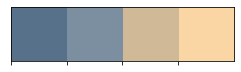

In [3]:
# задание палитры цветов
colors = ['#567189', '#7B8FA1', '#CFB997', '#FAD6A5']
sns.palplot(sns.color_palette(colors))

## 1. Подключение к базе данных

In [4]:
# безопасно запрашиваем ввод пароля в CLI
password = getpass.getpass(prompt="Enter secret password:")

Enter secret password:········


In [5]:
# создание подключения к базе данных
connect = psycopg2.connect(database='postgres',
                           user='postgres',
                           password=password,
                           host='127.0.0.1',
                           port='5432')

print('База данных успешно открыта')

База данных успешно открыта


In [6]:
# создание объекта курсора подключения к базе данных 'postgres'
cursor = connect.cursor()

In [8]:
# сумма прибыли по заказам, округление до центов и сортировка заказов по убыванию суммы прибыли 
cursor.execute("SELECT Order_ID, ROUND(SUM(Profit), 2) as Total_Profit \
                FROM orders \
                GROUP BY Order_ID \
                ORDER BY Total_Profit DESC;")
profit_per_order = cursor.fetchall()
profit_per_order
df = pd.DataFrame(profit_per_order, columns=['Order_ID', 'Total_Profit'])
df.head()

,Order_ID,Total_Profit
0,CA-2018-118689,8762.39
1,CA-2019-140151,6734.47
2,CA-2019-166709,5039.99
3,CA-2018-117121,4946.37
4,CA-2016-116904,4668.69


In [12]:
dict(profit_per_order)

{'CA-2018-118689': Decimal('8762.39'),
 'CA-2019-140151': Decimal('6734.47'),
 'CA-2019-166709': Decimal('5039.99'),
 'CA-2018-117121': Decimal('4946.37'),
 'CA-2016-116904': Decimal('4668.69'),
 'CA-2019-127180': Decimal('4597.17'),
 'CA-2017-145352': Decimal('3192.07'),
 'CA-2018-158841': Decimal('2825.29'),
 'US-2018-140158': Decimal('2640.48'),
 'CA-2019-138289': Decimal('2602.09'),
 'CA-2017-114811': Decimal('2509.09'),
 'US-2018-107440': Decimal('2381.16'),
 'US-2017-128587': Decimal('2306.74'),
 'US-2018-143819': Decimal('2253.43'),
 'CA-2016-164973': Decimal('2242.84'),
 'CA-2016-145541': Decimal('2239.99'),
 'CA-2017-120782': Decimal('1947.98'),
 'CA-2019-135909': Decimal('1938.38'),
 'CA-2017-111829': Decimal('1930.46'),
 'CA-2018-138478': Decimal('1691.31'),
 'CA-2019-165323': Decimal('1676.31'),
 'CA-2017-102491': Decimal('1605.70'),
 'CA-2016-160766': Decimal('1599.68'),
 'CA-2019-100111': Decimal('1571.80'),
 'CA-2018-133711': Decimal('1556.70'),
 'CA-2019-133263': Decima

In [11]:
dict(profit_per_order)['CA-2018-118689']

Decimal('8762.39')

In [7]:
# вывод наименований таблиц в базе данных 'postgres'
cursor.execute("SELECT table_name FROM information_schema.tables \
             WHERE table_schema NOT IN ('information_schema', 'pg_catalog') \
             AND table_schema IN('public', 'myschema');")
cursor.fetchall()

[('orders',), ('people',), ('returns',)]

## 2. SQL запросы

* Total Sales

In [9]:
# cумма продаж, округление до центов
cursor.execute("SELECT ROUND(SUM(Sales), 2) \
                FROM orders;")
sales_sum = cursor.fetchone()[0]
sales_sum

Decimal('2296919.49')

* Total Profit

In [10]:
# cумма прибыли, округление до центов
cursor.execute("SELECT ROUND(SUM(Profit), 2) \
                FROM orders;")
profit_sum = cursor.fetchone()[0]
profit_sum

Decimal('286409.08')

* Profit Ratio

In [11]:
# процентное отношение cуммы прибыли и cуммы продажи
cursor.execute("SELECT ROUND(SUM(Profit) / SUM(Sales) * 100, 2) \
                FROM orders;")
profit_ratio = cursor.fetchone()[0]
profit_ratio

Decimal('12.47')

* Profit per Order

In [12]:
# сумма прибыли по заказам, округление до центов и сортировка заказов по убыванию суммы прибыли 
cursor.execute("SELECT Order_ID, ROUND(SUM(Profit), 2) as Total_Profit \
                FROM orders \
                GROUP BY Order_ID \
                ORDER BY Total_Profit DESC;")
profit_per_order = cursor.fetchall()
profit_per_order
df = pd.DataFrame(profit_per_order, columns=['Order_ID', 'Total_Profit'])
df.head()

,Order_ID,Total_Profit
0,CA-2018-118689,8762.39
1,CA-2019-140151,6734.47
2,CA-2019-166709,5039.99
3,CA-2018-117121,4946.37
4,CA-2016-116904,4668.69


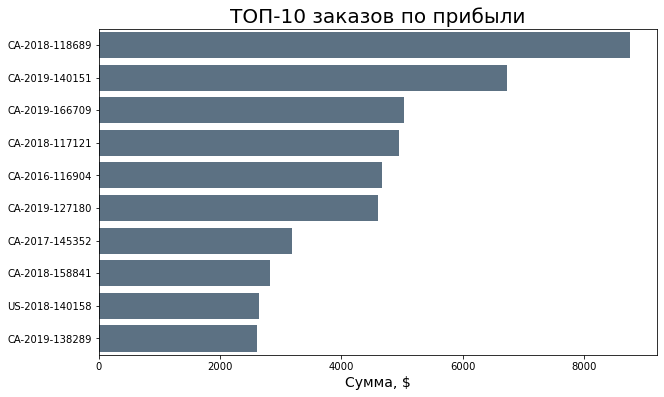

In [13]:
# визуализация ТОП-10 заказов по прибыли
plt.figure(figsize=(10,6))
sns.barplot(data=df[:10], x='Total_Profit', y='Order_ID', color=colors[0])
plt.title('ТОП-10 заказов по прибыли', size = 20)
plt.xlabel('Сумма, $', size = 14)
plt.ylabel('')
plt.show()

* Sales per Customer 

In [14]:
# сумма прибыли по покупателям, округление до центов и сортировка покупателей по убыванию суммы прибыли 
cursor.execute("SELECT Customer_ID, Customer_Name, ROUND(SUM(Profit), 2) as Total_Profit \
                FROM orders \
                GROUP BY Customer_ID, Customer_Name \
                ORDER BY Total_Profit DESC;")
profit_per_customer = cursor.fetchall()
df = pd.DataFrame(profit_per_customer, columns=['Customer_ID', 'Customer_Name', 'Total_Profit'])
df.head()

,Customer_ID,Customer_Name,Total_Profit
0,TC-20980,Tamara Chand,8981.32
1,RB-19360,Raymond Buch,6976.10
2,SC-20095,Sanjit Chand,5757.41
3,HL-15040,Hunter Lopez,5622.43
4,AB-10105,Adrian Barton,5444.81


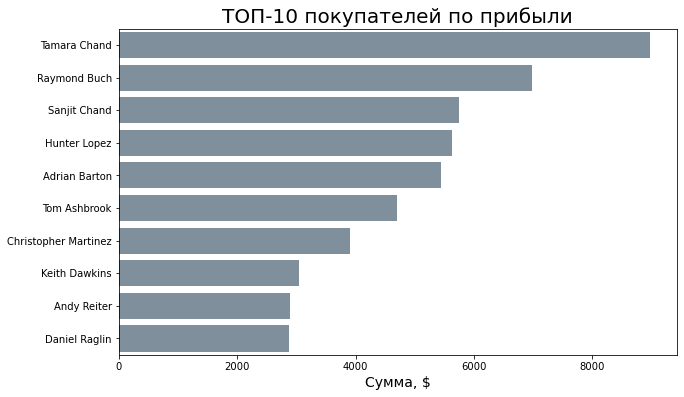

In [15]:
# визуализация ТОП-10 покупателей по прибыли
plt.figure(figsize=(10,6))
sns.barplot(data=df[:10], x='Total_Profit', y='Customer_Name', color=colors[1])
plt.title('ТОП-10 покупателей по прибыли', size = 20)
plt.xlabel('Сумма, $', size = 14)
plt.ylabel('')
plt.show()

* Avg. Discount

In [16]:
# средняя скидка в %
cursor.execute("SELECT ROUND(AVG(Discount) * 100, 2) \
                FROM orders;")
avg_discount = cursor.fetchone()[0]
avg_discount

Decimal('15.62')

* Monthly Sales by Segment

In [17]:
# сумма продаж в сегментах по месяцам
cursor.execute("SELECT TO_CHAR(Order_Date, 'YYYY-MM') as Date, Segment, ROUND(sum(Sales), 2) \
                FROM orders \
                GROUP BY Date, Segment \
                ORDER BY Date, Segment;")
monthly_sales_by_segment = cursor.fetchall()
df = pd.DataFrame(monthly_sales_by_segment, columns=['Order_Date', 'Segment', 'Total_Sales'])
df.head()

,Order_Date,Segment,Total_Sales
0,2016-01,Consumer,6927.82
1,2016-01,Corporate,1701.53
2,2016-01,Home Office,5607.55
3,2016-02,Consumer,3167.85
4,2016-02,Corporate,1183.67


In [18]:
# преобразование данных для визуализации
df_monthly_sales_by_segment = pd.pivot_table(df, index='Order_Date', values='Total_Sales', columns='Segment')
df_monthly_sales_by_segment.head()

Segment,Consumer,Corporate,Home Office
Order_Date,,,
2016-01,6927.82,1701.53,5607.55
2016-02,3167.85,1183.67,168.37
2016-03,11869.30,11106.80,32714.91
2016-04,9108.61,14131.73,4773.63
2016-05,12819.16,9142.00,1687.12


In [19]:
# тоже самое с помощью SQL запроса
cursor.execute("SELECT DISTINCT Segment \
                FROM orders;")
cursor.fetchall()

[('Consumer',), ('Corporate',), ('Home Office',)]

In [20]:
# тоже самое с помощью SQL запроса
cursor.execute("SELECT TO_CHAR(Order_Date, 'YYYY-MM') as Date, \
                       ROUND(sum(CASE WHEN Segment =  'Consumer' THEN Sales END), 2), \
                       ROUND(sum(CASE WHEN Segment =  'Corporate' THEN Sales END), 2), \
                       ROUND(sum(CASE WHEN Segment =  'Home Office' THEN Sales END), 2) \
                FROM orders \
                GROUP BY Date \
                ORDER BY Date;")
monthly_sales_by_segment = cursor.fetchall()
df = pd.DataFrame(monthly_sales_by_segment, columns=['Order_Date', 'Consumer', 'Corporate', 'Home Office']) \
                 .set_index('Order_Date')
df.head()

,Consumer,Corporate,Home Office
Order_Date,,,
2016-01,6927.82,1701.53,5607.55
2016-02,3167.85,1183.67,168.37
2016-03,11869.30,11106.80,32714.91
2016-04,9108.61,14131.73,4773.63
2016-05,12819.16,9142.00,1687.12


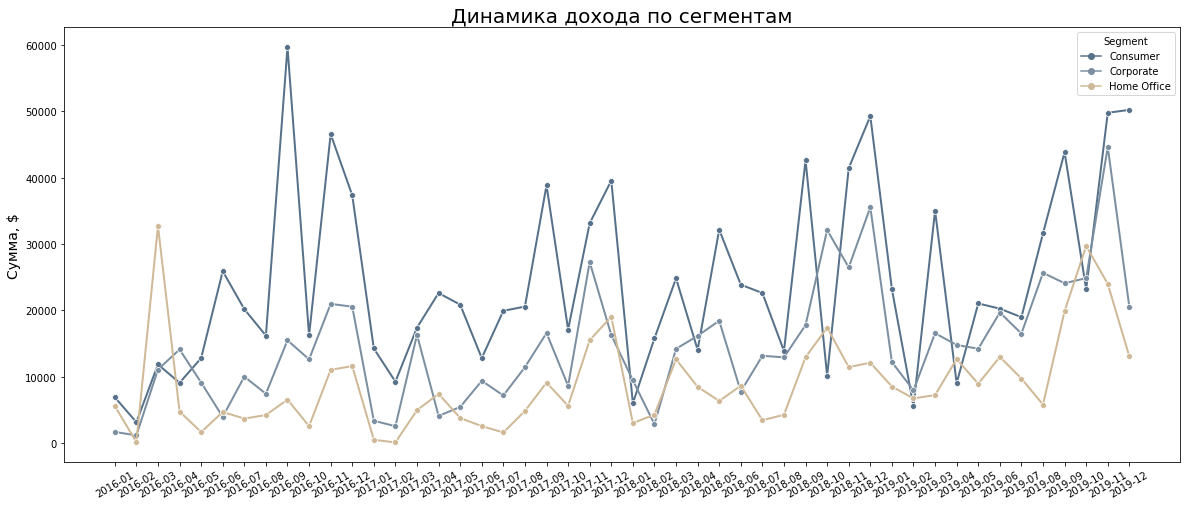

In [21]:
# визуализация динамики продаж по сегментам
plt.figure(figsize=(20,8))
sns.lineplot(data=df_monthly_sales_by_segment, dashes=False, markers=['o', 'o', 'o'], \
             lw=2, palette=sns.color_palette(colors[:3]))
plt.title('Динамика дохода по сегментам', size = 20)
plt.xlabel('')
plt.xticks(rotation=30)
plt.ylabel('Сумма, $', size = 14)
plt.show()

* Monthly Sales by Product Category

In [22]:
# сумма продаж в категориях по месяцам
cursor.execute("SELECT TO_CHAR(Order_Date, 'YYYY-MM') as Date, Category, ROUND(sum(Sales), 2) \
                FROM orders \
                GROUP BY Date, Category \
                ORDER BY Date, Category;")
monthly_sales_by_category = cursor.fetchall()
df = pd.DataFrame(monthly_sales_by_category, columns=['Order_Date', 'Сategory', 'Total_Sales'])
df.head()

,Order_Date,Сategory,Total_Sales
0,2016-01,Furniture,6242.53
1,2016-01,Office Supplies,4851.08
2,2016-01,Technology,3143.29
3,2016-02,Furniture,1839.66
4,2016-02,Office Supplies,1071.72


In [23]:
# преобразование данных для визуализации
df_monthly_sales_by_category = pd.pivot_table(df, index='Order_Date', values='Total_Sales', columns='Сategory')
df_monthly_sales_by_category.head()

Сategory,Furniture,Office Supplies,Technology
Order_Date,,,
2016-01,6242.53,4851.08,3143.29
2016-02,1839.66,1071.72,1608.51
2016-03,14573.96,8605.88,32511.17
2016-04,7663.47,11155.07,9195.43
2016-05,6912.79,7135.62,9599.88


In [24]:
# тоже самое с помощью SQL запроса
cursor.execute("SELECT DISTINCT Category \
                FROM orders;")
cursor.fetchall()

[('Furniture',), ('Office Supplies',), ('Technology',)]

In [25]:
# тоже самое с помощью SQL запроса
cursor.execute("SELECT TO_CHAR(Order_Date, 'YYYY-MM') as Date, \
                       ROUND(sum(CASE WHEN Category =  'Furniture' THEN Sales END), 2), \
                       ROUND(sum(CASE WHEN Category =  'Office Supplies' THEN Sales END), 2), \
                       ROUND(sum(CASE WHEN Category =  'Technology' THEN Sales END), 2) \
                FROM orders \
                GROUP BY Date \
                ORDER BY Date;")
monthly_sales_by_category = cursor.fetchall()
df = pd.DataFrame(monthly_sales_by_category, columns=['Order_Date', 'Furniture', 'Office Supplies', 'Technology']) \
                 .set_index('Order_Date')
df.head()

,Furniture,Office Supplies,Technology
Order_Date,,,
2016-01,6242.53,4851.08,3143.29
2016-02,1839.66,1071.72,1608.51
2016-03,14573.96,8605.88,32511.17
2016-04,7663.47,11155.07,9195.43
2016-05,6912.79,7135.62,9599.88


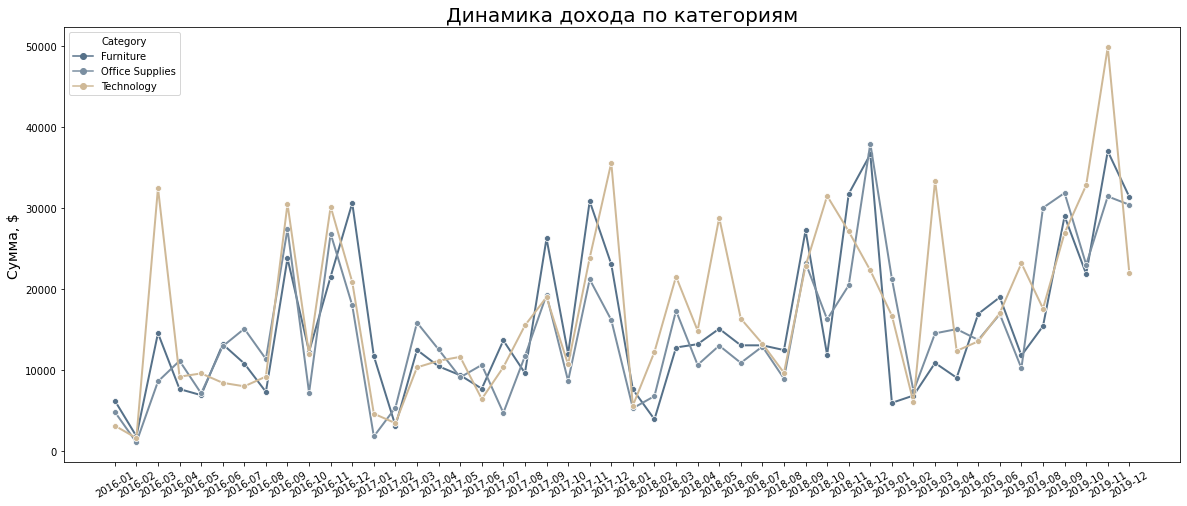

In [26]:
# визуализация динамики продаж по категориям
plt.figure(figsize=(20,8))
sns.lineplot(data=df_monthly_sales_by_category, dashes=False, markers=['o', 'o', 'o'], \
             lw=2, palette=sns.color_palette(colors[:3]))
plt.title('Динамика дохода по категориям', size = 20)
plt.xlabel('')
plt.xticks(rotation=30)
plt.ylabel('Сумма, $', size = 14)
plt.show()

* Sales by Product Category over time

In [27]:
# сумма продаж в категориях по месяцам
cursor.execute("SELECT TO_CHAR(Order_Date, 'YYYY-WW') as Year_Week, Category, ROUND(sum(Sales), 2) \
                FROM orders \
                GROUP BY Year_Week, Category \
                ORDER BY Year_Week, Category;")
year_week_sales_by_category = cursor.fetchall()
df = pd.DataFrame(year_week_sales_by_category, columns=['Year_Week', 'Сategory', 'Total_Sales'])
df.head()

,Year_Week,Сategory,Total_Sales
0,2016-01,Furniture,2650.55
1,2016-01,Office Supplies,1019.81
2,2016-01,Technology,1147.94
3,2016-02,Furniture,1003.78
4,2016-02,Office Supplies,2039.35


In [28]:
# преобразование данных для визуализации
df_year_week_sales_by_category = pd.pivot_table(df, index='Year_Week', values='Total_Sales', columns='Сategory')
df_year_week_sales_by_category.head()

Сategory,Furniture,Office Supplies,Technology
Year_Week,,,
2016-01,2650.55,1019.81,1147.94
2016-02,1003.78,2039.35,677.94
2016-03,1747.33,871.08,974.08
2016-04,550.20,680.34,343.33
2016-05,290.67,502.68,649.86


In [29]:
# тоже самое с помощью SQL запроса
cursor.execute("SELECT TO_CHAR(Order_Date, 'YYYY-WW') as Year_Week, \
                       ROUND(sum(CASE WHEN Category =  'Furniture' THEN Sales END), 2), \
                       ROUND(sum(CASE WHEN Category =  'Office Supplies' THEN Sales END), 2), \
                       ROUND(sum(CASE WHEN Category =  'Technology' THEN Sales END), 2) \
                FROM orders \
                GROUP BY Year_Week \
                ORDER BY Year_Week;")
year_week_sales_by_category = cursor.fetchall()
df = pd.DataFrame(year_week_sales_by_category, columns=['Year_Week', 'Furniture', 'Office Supplies', 'Technology']) \
                 .set_index('Year_Week')
df.head()

,Furniture,Office Supplies,Technology
Year_Week,,,
2016-01,2650.55,1019.81,1147.94
2016-02,1003.78,2039.35,677.94
2016-03,1747.33,871.08,974.08
2016-04,550.20,680.34,343.33
2016-05,290.67,502.68,649.86


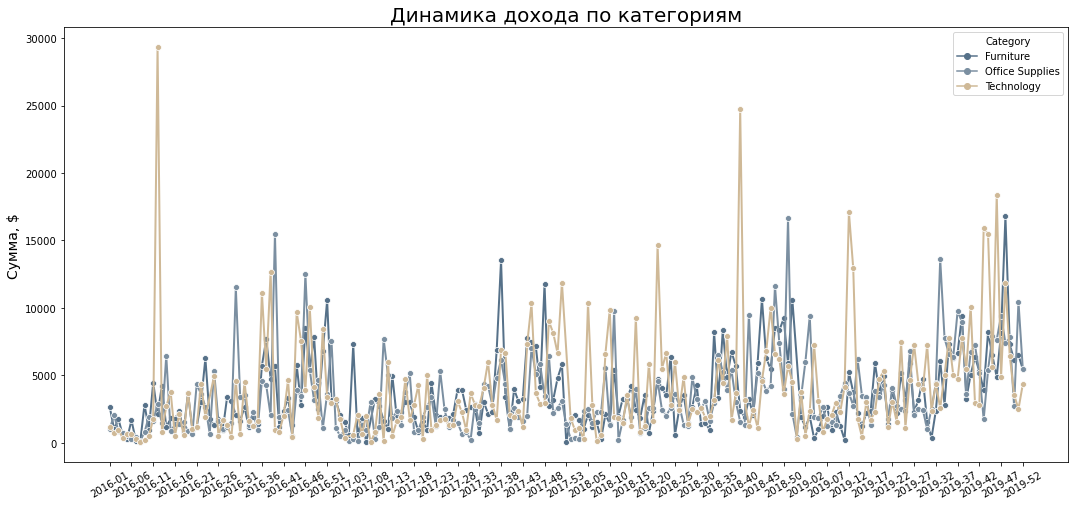

In [30]:
# визуализация динамики продаж по категориям
plt.figure(figsize=(18,8))
sns.lineplot(data=df_year_week_sales_by_category, dashes=False, markers=['o', 'o', 'o'], \
             lw=2, palette=sns.color_palette(colors[:3]))
plt.title('Динамика дохода по категориям', size = 20)
plt.xlabel('')
plt.ylabel('Сумма, $', size = 14)
plt.xticks([df_year_week_sales_by_category.index[i] for i in range(0, len(df_year_week_sales_by_category.index), 5)], \
           rotation=30)
plt.show()

* Sales and Profit by Customer

In [31]:
# сумма продаж и прибыли по покупателям
cursor.execute("SELECT Customer_ID, Customer_Name, \
                       ROUND(SUM(Sales), 2) as Total_Sales, ROUND(SUM(Profit), 2) as Total_Profit \
                FROM orders \
                GROUP BY Customer_ID, Customer_Name \
                ORDER BY Total_Profit DESC;")
sales_profit_per_customer = cursor.fetchall()
df = pd.DataFrame(sales_profit_per_customer, columns=['Customer_ID', 'Customer_Name', 'Total_Sales', 'Total_Profit'])
df.head()

,Customer_ID,Customer_Name,Total_Sales,Total_Profit
0,TC-20980,Tamara Chand,19052.22,8981.32
1,RB-19360,Raymond Buch,15117.34,6976.10
2,SC-20095,Sanjit Chand,14142.33,5757.41
3,HL-15040,Hunter Lopez,12873.30,5622.43
4,AB-10105,Adrian Barton,14473.57,5444.81


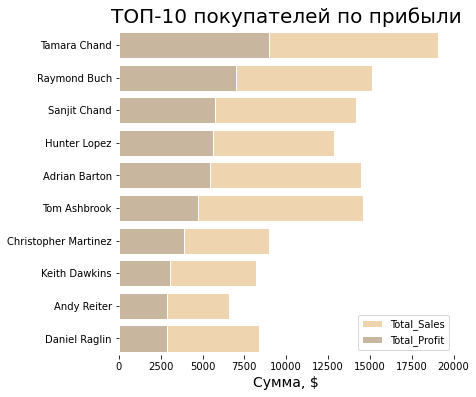

In [32]:
# визуализация ТОП-10 покупателей по прибыли
fig, ax = plt.subplots(figsize = (6,6))
sns.barplot(data=df[:10], x='Total_Sales', y='Customer_Name', label = 'Total_Sales', color = colors[3], edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(data=df[:10], x='Total_Profit', y='Customer_Name', label = 'Total_Profit', color = colors[2], edgecolor = 'w')
ax.legend(loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.title('ТОП-10 покупателей по прибыли', size = 20)
plt.xlabel('Сумма, $', size = 14)
plt.ylabel('')
plt.show()

* Customer Ranking

In [33]:
# средния продажа и прибыль по покупателям
cursor.execute("SELECT Customer_ID, Customer_Name, \
                       ROUND(AVG(Sales), 2) as Avg_Sales, ROUND(AVG(Profit), 2) as Avg_Profit \
                FROM orders \
                GROUP BY Customer_ID, Customer_Name \
                ORDER BY Avg_Profit DESC;")
customer_ranking = cursor.fetchall()
df = pd.DataFrame(customer_ranking, columns=['Customer_ID', 'Customer_Name', 'Avg_Sales', 'Avg_Profit'])
df.head()

,Customer_ID,Customer_Name,Avg_Sales,Avg_Profit
0,TC-20980,Tamara Chand,1587.68,748.44
1,MW-18235,Mitch Willingham,1751.29,555.17
2,HL-15040,Hunter Lopez,1170.30,511.13
3,TA-21385,Tom Ashbrook,1459.56,470.38
4,CM-12385,Christopher Martinez,895.40,389.99


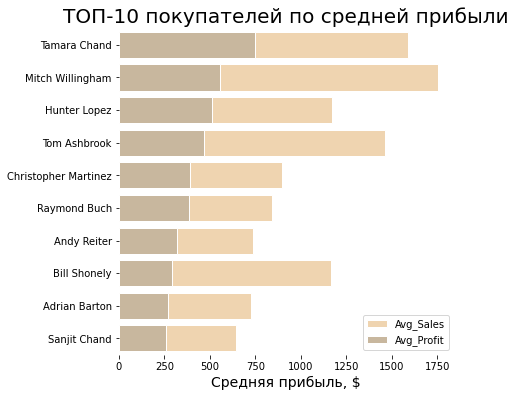

In [34]:
# визуализация ТОП-10 покупателей по средней прибыли
fig, ax = plt.subplots(figsize = (6,6))
sns.barplot(data=df[:10], x='Avg_Sales', y='Customer_Name', label = 'Avg_Sales', color = colors[3], edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(data=df[:10], x='Avg_Profit', y='Customer_Name', label = 'Avg_Profit', color = colors[2], edgecolor = 'w')
ax.legend(loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.title('ТОП-10 покупателей по средней прибыли', size = 20)
plt.xlabel('Средняя прибыль, $', size = 14)
plt.ylabel('')
plt.show()

* Sales per region

In [35]:
# суммарные продажи по регионам
cursor.execute("SELECT Region, \
                       ROUND(SUM(Sales), 2) as Sum_Sales \
                FROM orders \
                GROUP BY Region \
                ORDER BY Sum_Sales DESC;")
sales_region = cursor.fetchall()
df = pd.DataFrame(sales_region, columns=['Region', 'Total_Sales'])
df.head()

,Region,Total_Sales
0,West,725457.82
1,East,678499.87
2,Central,501239.89
3,South,391721.91


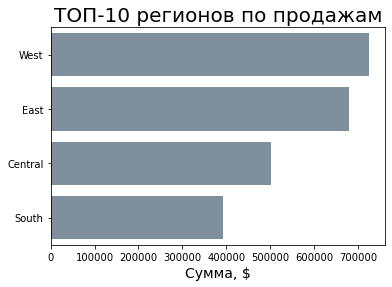

In [36]:
# визуализация ТОП-10 регионов по продажам
plt.figure(figsize=(6,4))
sns.barplot(data=df[:10], x='Total_Sales', y='Region', color=colors[1])
plt.title('ТОП-10 регионов по продажам', size = 20)
plt.xlabel('Сумма, $', size = 14)
plt.ylabel('')
plt.show()

In [37]:
# закрытие подключения к базе данных 'postgres'
connect.close()